<AxesSubplot:>

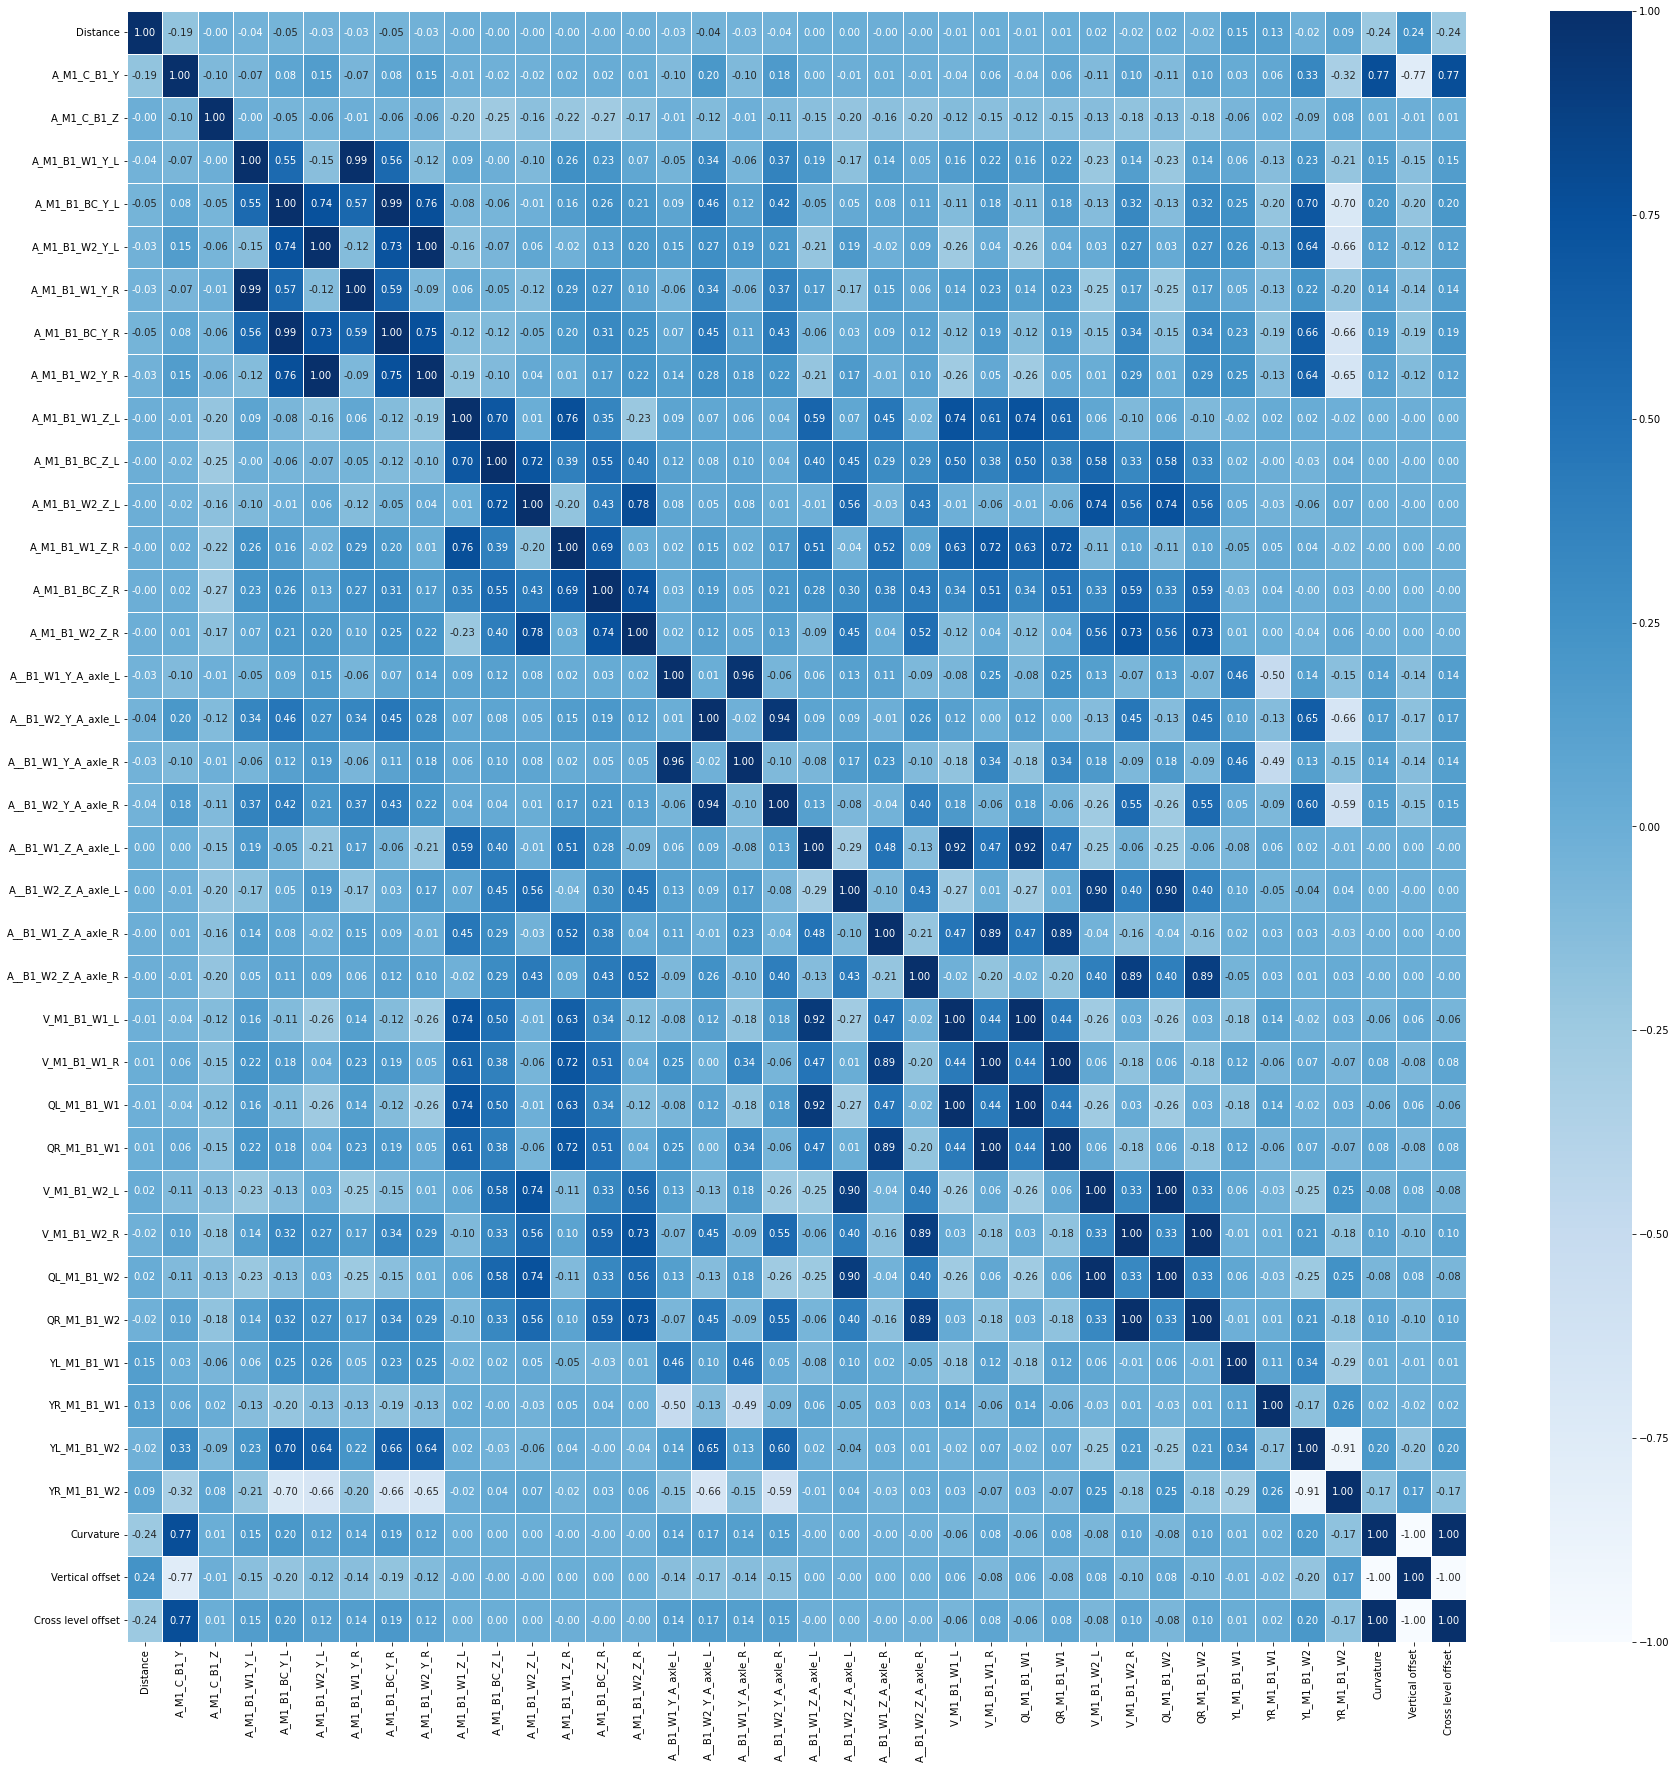

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

# 데이터이해
# 데이터의 종류 : 직선, 커브
# 하위 데이터 셋의 종류 : 댐퍼의 측정치(측정 기준마다 셋이 다름), 선로의 정보
# 총 12개의 데이터
# 컬럼은 각종 측정치들 열차가 진행될때,측정이 되나봄

# 1.상관계수 확인해보기
df_c30 = pd.read_csv('/home/archer/xelnaga-predictor/jupyter/train/data/data_c30.csv')
l_c = pd.read_csv('/home/archer/xelnaga-predictor/jupyter/train/data/lane_data_c.csv')


tmp = pd.merge(df_c30, l_c, on="Distance")
tmp = tmp[tmp['Distance'] < 2500]
tmp_corr_df = tmp.corr()

s = tmp_corr_df.unstack()

# 히트맵으로 구성해보기
plt.figure(figsize=(30,30))
sns.heatmap(data = tmp_corr_df, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

# taget과 상관있는 feature들 눈으로 봤을때, 몇몇개로 보인다.


'\n선로의 정보들은 상관 계수가 낮았지만 그냥 넣어보자.\n'

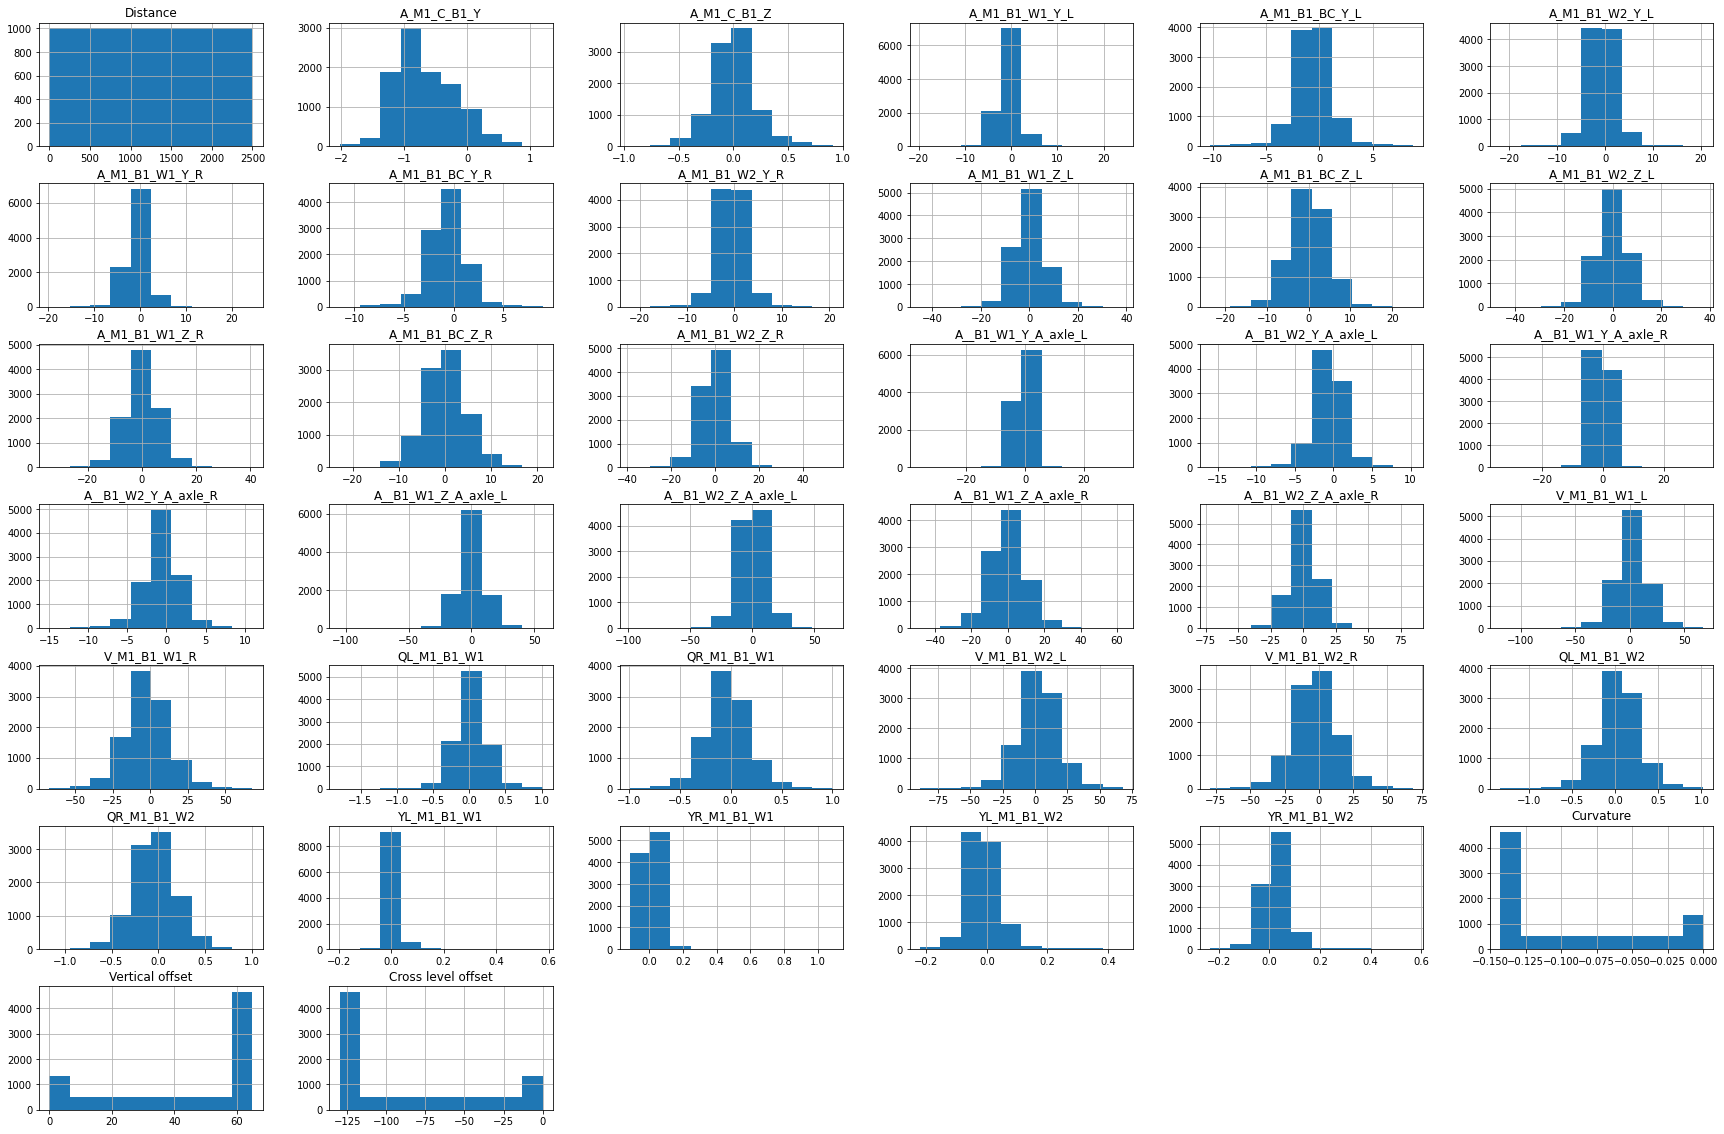

In [49]:
# 변수의 분포를 보자.
# 
h = tmp.hist(figsize=(30,20))
## 대부분 평균이 0이 되는 분포를 따르고 있다.
## 라인에 대한 정보는 그렇지 않다.


# feature 선택
# 위 히트맵을 보고 선택했다.
# 모든 변수를 PCA를 하진 않았다. 

"""
프레임 횡가속도
A_M1_B1_W1_Y_L
A_M1_B1_BC_Y_L
A_M1_B1_W2_Y_L
A_M1_B1_W1_Y_R
A_M1_B1_BC_Y_R
A_M1_B1_W2_Y_R
"""

"""
액슬박스 횡가속도
A__B1_W1_Y_A_axle_L
A__B1_W2_Y_A_axle_L
A__B1_W1_Y_A_axle_R
A__B1_W2_Y_A_axle_R
"""

"""
선로의 정보들은 상관 계수가 낮았지만 그냥 넣어보자.
"""

/home/archer/.pyenv/shims/python


In [3]:

# 데이터 구성
# 고려할점
# 1. 위에서 선택된 변수들
# 2. 댑퍼별 데이터셋들
# 3. 과거 데이터 입력
# 4. 딥러닝 알고리즘
## 데이터를 이미지 처럼 구성하고, CNN으로 진행한다.
## RNN, LSTM 은 데이터 구조 잡기가 안떠오른다.




import pandas as pd
import seaborn as sns
df_l_c = pd.read_csv('/home/archer/xelnaga-predictor/jupyter/train/data/lane_data_c.csv')

df_c30 = pd.read_csv('/home/archer/xelnaga-predictor/jupyter/train/data/data_c30.csv')
df_c40 = pd.read_csv('/home/archer/xelnaga-predictor/jupyter/train/data/data_c50.csv')
df_c50 = pd.read_csv('/home/archer/xelnaga-predictor/jupyter/train/data/data_c50.csv')
df_c70 = pd.read_csv('/home/archer/xelnaga-predictor/jupyter/train/data/data_c70.csv')
df_c100 = pd.read_csv('/home/archer/xelnaga-predictor/jupyter/train/data/data_c100.csv')


tmp_30 = pd.merge(df_c30, l_c, on="Distance")
tmp_40 = pd.concat([df_c40, l_c], axis=1)
tmp_50 = pd.concat([df_c50, l_c], axis=1)
tmp_70 = pd.concat([df_c70, l_c], axis=1)
tmp_100 = pd.concat([df_c100, l_c], axis=1)


cols = ["Distance","A_M1_B1_W1_Y_L","A_M1_B1_BC_Y_L","A_M1_B1_W2_Y_L","A_M1_B1_W1_Y_R","A_M1_B1_BC_Y_R","A_M1_B1_W2_Y_R",
"A__B1_W1_Y_A_axle_L","A__B1_W2_Y_A_axle_L","A__B1_W1_Y_A_axle_R","A__B1_W2_Y_A_axle_R",
"Curvature","Vertical offset","Cross level offset",
"YL_M1_B1_W1","YR_M1_B1_W1","YL_M1_B1_W2","YR_M1_B1_W2",
]

features = ["A_M1_B1_W1_Y_L","A_M1_B1_BC_Y_L","A_M1_B1_W2_Y_L","A_M1_B1_W1_Y_R","A_M1_B1_BC_Y_R","A_M1_B1_W2_Y_R",
            "A__B1_W1_Y_A_axle_L","A__B1_W2_Y_A_axle_L","A__B1_W1_Y_A_axle_R","A__B1_W2_Y_A_axle_R",
            "Curvature","Vertical offset","Cross level offset",
           ]
tmp_30.loc[10][features]


A_M1_B1_W1_Y_L         0.3896
A_M1_B1_BC_Y_L         0.3508
A_M1_B1_W2_Y_L         0.3119
A_M1_B1_W1_Y_R         0.3892
A_M1_B1_BC_Y_R         0.3503
A_M1_B1_W2_Y_R         0.3114
A__B1_W1_Y_A_axle_L   -0.6423
A__B1_W2_Y_A_axle_L   -0.1433
A__B1_W1_Y_A_axle_R   -0.6446
A__B1_W2_Y_A_axle_R   -0.1434
Curvature              0.0000
Vertical offset        0.0000
Cross level offset     0.0000
Name: 10, dtype: float64

In [4]:
features = ["A_M1_B1_W1_Y_L","A_M1_B1_BC_Y_L","A_M1_B1_W2_Y_L","A_M1_B1_W1_Y_R","A_M1_B1_BC_Y_R","A_M1_B1_W2_Y_R",
            "A__B1_W1_Y_A_axle_L","A__B1_W2_Y_A_axle_L","A__B1_W1_Y_A_axle_R","A__B1_W2_Y_A_axle_R",
            "Curvature","Vertical offset","Cross level offset",
           ]

targets = ["YL_M1_B1_W1","YR_M1_B1_W1","YL_M1_B1_W2","YR_M1_B1_W2",
           ]


train_x = []
train_y = []

test_x = []
test_y = []


window = 10
for i in tmp_30.index:
    if i < window :
        continue
    if tmp_30['Distance'][i] <= 2500:
        train_x.append([tmp_30[i-window:i][features].values.tolist()])
        train_y.append(tmp_30.loc[i][targets].values.tolist())

    if tmp_30['Distance'][i] > 2500:
        test_x.append([tmp_30[i-window:i][features].values.tolist()])
        test_y.append(tmp_30.loc[i][targets].values.tolist())

In [57]:
import datetime 
import torch 
import torch.nn as nn 
from torch.autograd import Variable 
import torch.optim as optim 
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
import torch.nn as nn
from einops.layers.torch import Rearrange, Reduce
# 필요한 함수 정의

import os
import sys
import datetime

import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
from sklearn import preprocessing

# x 데이터 불러오기
import warnings
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
from sklearn import preprocessing
import numpy as np
##warnings.filterwarnings(action='ignore')

import datetime 
import torch 
import torch.nn as nn 
from torch.autograd import Variable 
import torch.optim as optim 
from torch.utils.data import Dataset, DataLoader,TensorDataset


device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    print("cuda")
    torch.cuda.manual_seed_all(777)
    
device = 'cpu'

x_train_tensors = Variable(torch.Tensor(train_x).to(device)) 
y_train_tensors = Variable(torch.Tensor(train_y).to(device)) 

print(x_train_tensors.shape)
print(y_train_tensors.shape)

x_test_tensors = Variable(torch.Tensor(test_x).to(device)) 
y_test_tensors = Variable(torch.Tensor(test_y).to(device))

print(x_test_tensors.shape)
print(y_test_tensors.shape)

print("========================================================")
print("train ==================================================")
print("x_train_tensors.shape: {}".format(x_train_tensors.shape))
print("y_train_tensors.shape: {}".format(y_train_tensors.shape))
print("train_true_cnt       : {}".format(y_train_tensors.sum()))
print("train_true_per       : {}".format(y_train_tensors.sum()/y_train_tensors.shape[0]))
print("========================================================")
print("test ==================================================")
print("x_test_tensors.shape: {}".format(x_test_tensors.shape))
print("y_test_tensors.shape: {}".format(y_test_tensors.shape))
print("test_true_cnt       : {}".format(y_test_tensors.sum()))
print("test_true_per       : {}".format(y_test_tensors.sum()/y_test_tensors.shape[0]))
print("========================================================")


cuda
torch.Size([9991, 1, 10, 13])
torch.Size([9991, 4])
torch.Size([1999, 1, 10, 13])
torch.Size([1999, 4])
train ==================================================
x_train_tensors.shape: torch.Size([9991, 1, 10, 13])
y_train_tensors.shape: torch.Size([9991, 4])
train_true_cnt       : 351.7207946777344
train_true_per       : 0.03520376235246658
test ==================================================
x_test_tensors.shape: torch.Size([1999, 1, 10, 13])
y_test_tensors.shape: torch.Size([1999, 4])
test_true_cnt       : 0.0
test_true_per       : 0.0


In [59]:

#https://velog.io/@groovallstar/cnn


class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=2, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4160, 20, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)

        self.layer2 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob)
        )
        
        # L5 Final FC 625 inputs -> 10 outputs
        
        self.fc2 = torch.nn.Linear(20, 4, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.layer3 = torch.nn.Sequential(
            self.fc2,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob)
        )

    def forward(self, x):
        out = self.layer1(x)

        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer2(out)
        out = self.layer3(out)
        ##out = self.sigmoid(out)
        return out
    

In [62]:
    
## 모델 서머리
cnn_model = CNN().to(device)

dummy_data = torch.rand(10, 1, 10, 13).to(device)
output = cnn_model(dummy_data)
print(output.shape)

parameters = filter(lambda p: p.requires_grad, cnn_model.parameters())
parameters = sum([np.prod(p.size()) for p in parameters]) / 1_000_000  # 18.528 million#
print('Trainable Parameters: %.3fM' % parameters)

###model.summary
import pytorch_model_summary
#print(pytorch_model_summary.summary(cnn_model, dummy_data, show_input=True))
    
    

torch.Size([10, 4])
Trainable Parameters: 0.083M
------------------------------------------------------------------------
      Layer (type)          Input Shape         Param #     Tr. Param #
          Conv2d-1      [10, 1, 10, 13]             160             160
            ReLU-2     [10, 32, 11, 14]               0               0
       MaxPool2d-3     [10, 32, 11, 14]               0               0
          Linear-4           [10, 4160]          83,220          83,220
            ReLU-5             [10, 20]               0               0
         Dropout-6             [10, 20]               0               0
          Linear-7             [10, 20]              84              84
            ReLU-8              [10, 4]               0               0
         Dropout-9              [10, 4]               0               0
Total params: 83,464
Trainable params: 83,464
Non-trainable params: 0
------------------------------------------------------------------------


start epoch
start epoch
Epoch    0/100 Cost: 0.002914
Epoch    1/100 Cost: 0.002902
Epoch    2/100 Cost: 0.002902
Epoch    3/100 Cost: 0.002945
Epoch    4/100 Cost: 0.002914
Epoch    5/100 Cost: 0.002932
Epoch    6/100 Cost: 0.002921
Epoch    7/100 Cost: 0.002924
Epoch    8/100 Cost: 0.002950
Epoch    9/100 Cost: 0.002923
Epoch   10/100 Cost: 0.002918
Epoch   11/100 Cost: 0.002922
Epoch   12/100 Cost: 0.002931
Epoch   13/100 Cost: 0.002912
Epoch   14/100 Cost: 0.002943
Epoch   15/100 Cost: 0.002914
Epoch   16/100 Cost: 0.002913
Epoch   17/100 Cost: 0.002910
Epoch   18/100 Cost: 0.002933
Epoch   19/100 Cost: 0.002934
Epoch   20/100 Cost: 0.002931
Epoch   21/100 Cost: 0.002926
Epoch   22/100 Cost: 0.002913
Epoch   23/100 Cost: 0.002917
Epoch   24/100 Cost: 0.002918
Epoch   25/100 Cost: 0.002921
Epoch   26/100 Cost: 0.002913
Epoch   27/100 Cost: 0.002917
Epoch   28/100 Cost: 0.002935
Epoch   29/100 Cost: 0.002939
Epoch   30/100 Cost: 0.002893
Epoch   31/100 Cost: 0.002912
Epoch   32/100 C

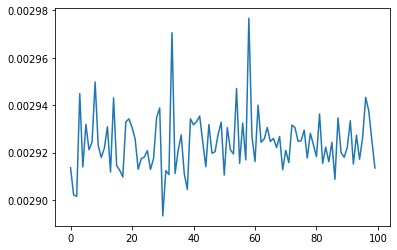

In [67]:

x_train_tensors = Variable(torch.Tensor(train_x).to(device)) 
y_train_tensors = Variable(torch.Tensor(train_y).to(device)) 


#
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.0000001)

losses = []
epoch_num = 10
print("start epoch")

losses = []
epoch_num = 100
print("start epoch")
for epoch in range(epoch_num):
    optimizer.zero_grad()
    hypothesis = cnn_model(x_train_tensors)
    ##print(hypothesis)
    cost = criterion(hypothesis, y_train_tensors)
    cost.backward()
    optimizer.step()

    if epoch % 1 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
              epoch, epoch_num, cost.item()
        ))
    losses.append(cost.item())

print("end epoch")
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
plt.plot(losses)


In [69]:
y = cnn_model(x_test_tensors)
#y_test_tensors.tolist()
 
df1 = pd.DataFrame(y.detach().numpy())
df2 = pd.DataFrame(y_test_tensors.detach().numpy())


re = pd.concat([df1, df2], axis=1)
csv_filename = 're.csv'
re.to_csv(csv_filename, index=False)  # index=False를 지정하여 인덱스를 저장하지 않음


In [43]:
tmp_40

,0,1,2,3,0,1,2,3
0,0.0,0.284988,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.284988,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.284988,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.284988,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1994,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.284988,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## 뭐가 문제냐?
# 전체 데이터를 학습시킨거는 아니다.
# 모델 파라미터를 조정한것도 아니다.
# 데이터 정규화 처리를 해준것도 아니다.
# 피처 엔지니어링 한것도 아니얌
# 예측해야하는 값이 매우 작은 값이다. 이것을 스케일을 늘리는 방법을 고려해보는게 좋겠다.
# 매우 작은값을 어떻게 때려 맞출수 있을까?


